In [ ]:
import datasets as dt
import models.SpinalNet as snet # needs images.to("cuda")
import models.CapsuleNetwork as cnet
from torch.utils.data import DataLoader
from torch import Tensor, argmax, mean
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import normalize

# Same-sized input
dataset = dt.get_historical_dataset("raw")
raw_loader = DataLoader(dataset, 128, num_workers=4, shuffle=True)
model = snet.get_model()
model.eval()

n_correct = 0
count = 0

for images, labels in raw_loader:
    with torch.no_grad():
        preds: Tensor  = model(images.to("cuda"))
        n_correct += sum(torch.max(preds.data, 1)[1].cpu() == labels).item()
        count += labels.size(0)
        print(f"Partial accuracy: {n_correct / count}", flush=True)

accuracy = n_correct / count

In [ ]:
accuracy

0.9107446808510639

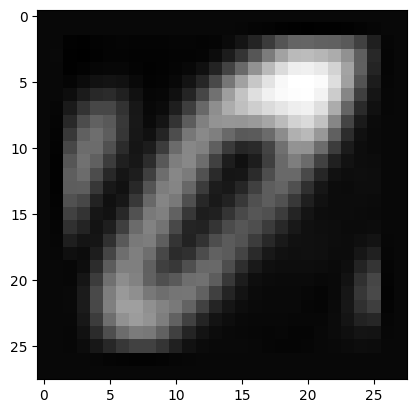

tensor([[44, 41, 44, 41, 41,  6, 16, 14, 10, 38, 26, 14, 16, 33, 18, 10]])

In [37]:
img = dataset.__getitem__(5)[0]

plt.imshow(img.permute(1, 2, 0).numpy(), cmap="grey")
plt.show()

res:Tensor = model(torch.unsqueeze(img, 0))[0]
res.argmax(axis=1)

In [22]:
idx_to_class = {idx: cls for cls, idx in dt.EMNIST_TEST.class_to_idx.items()}

#pred_labels = np.vectorize(idx_to_class.get)(preds)
#actual_labels = np.vectorize(idx_to_class.get)(labels)
print(sum(torch.max(preds.data, 1)[1].cpu() == labels) / len(labels))

tensor(0.5078)
